# Task 2 - Red Wine Quality

- This datasets is related to red variants of the Portuguese "Vinho Verde" wine.The dataset describes the amount of various chemicals present in wine and their effect on it's quality. The datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones).Your task is to predict the quality of wine using the given data.

----------------------------------------------------------------------------------------------------------------------------
- A simple yet challenging project, to anticipate the quality of wine.
- The complexity arises due to the fact that the dataset has fewer samples, & is highly imbalanced.

In [1]:
import warnings  
warnings.filterwarnings('ignore')

In [2]:
#Importing the Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading the dataset and doing basic EDA to understand the dataset

In [3]:
#Importing the dataset

wine = pd.read_csv('winequality-red.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.shape

(1599, 12)

In [5]:
wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [6]:
#Checking for any missing column

wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

- We can see that there are no missing columns so we can see that the dataset seems uniform

- Considering the dataset mainly focuses on the quality, we will draw a quick histogram to understand the column

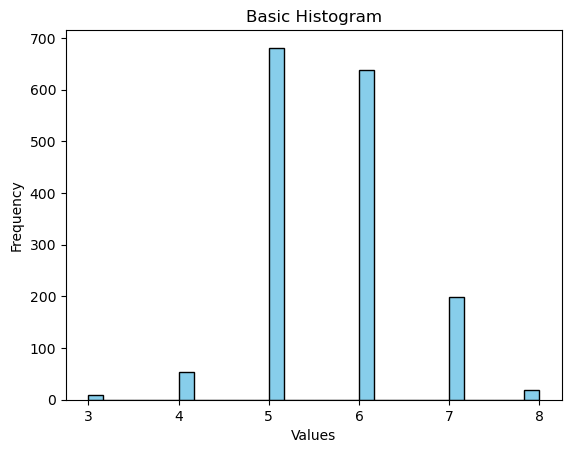

In [7]:
plt.hist(wine.quality, bins=30, color='skyblue', edgecolor='black')
 
# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Basic Histogram')
 
# Display the plot
plt.show()

# Making binary classification for the response variable.

In [8]:
from sklearn.preprocessing import LabelEncoder
bins = (2, 6.5, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
label_quality = LabelEncoder()
wine['quality'] = label_quality.fit_transform(wine['quality'])
wine['quality'].value_counts()

quality
0    1382
1     217
Name: count, dtype: int64

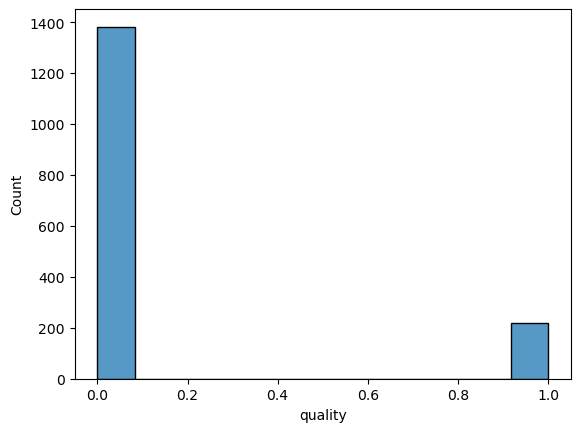

In [12]:
#plotting response variable

sns.histplot(wine['quality'])
plt.show()

In [13]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

- Understanding the numerical columns

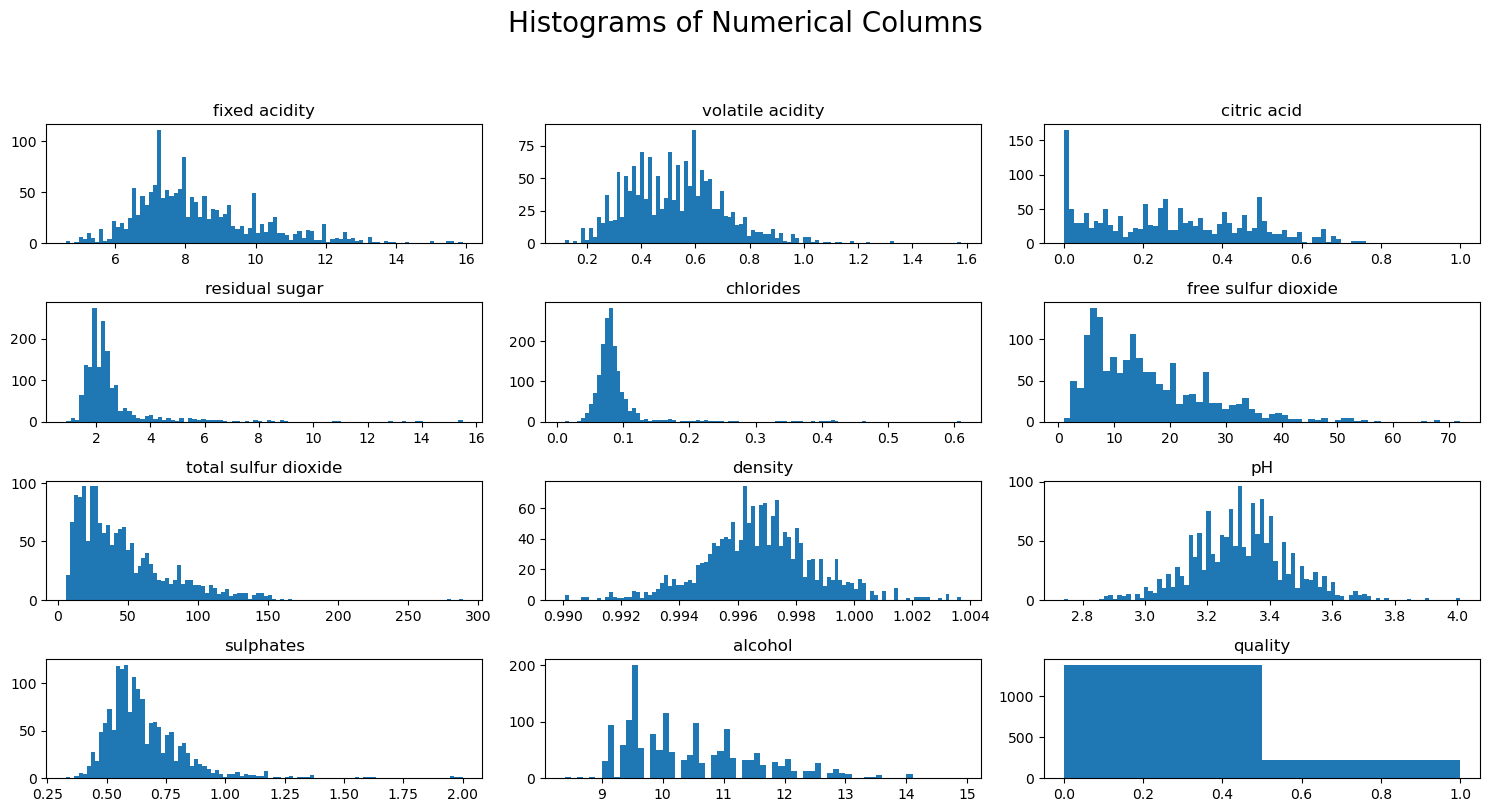

In [15]:
fig = plt.figure(figsize=(15, 12))
plt.suptitle('Histograms of Numerical Columns', fontsize=20)
for i in range(wine.shape[1]):
    plt.subplot(6, 3, i + 1)
    f = plt.gca()
    f.set_title(wine.columns.values[i])

    vals = np.size(wine.iloc[:, i].unique())
    if vals >= 100:
        vals = 100
    
    plt.hist(wine.iloc[:, i], bins=vals)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# INSIGHTS

- The dataset shows that most features, like fixed acidity, volatile acidity, and residual sugar, are right-skewed, indicating that lower values are more common. 
- The pH and density distributions are more normally distributed, suggesting consistency across samples.
- Quality is heavily skewed towards lower values, implying that higher quality wines are less common.
- The dataset overall indicates a trend towards moderate levels of chemical components, with few extreme values.

# Understanding colerration of quality with respect to other columns

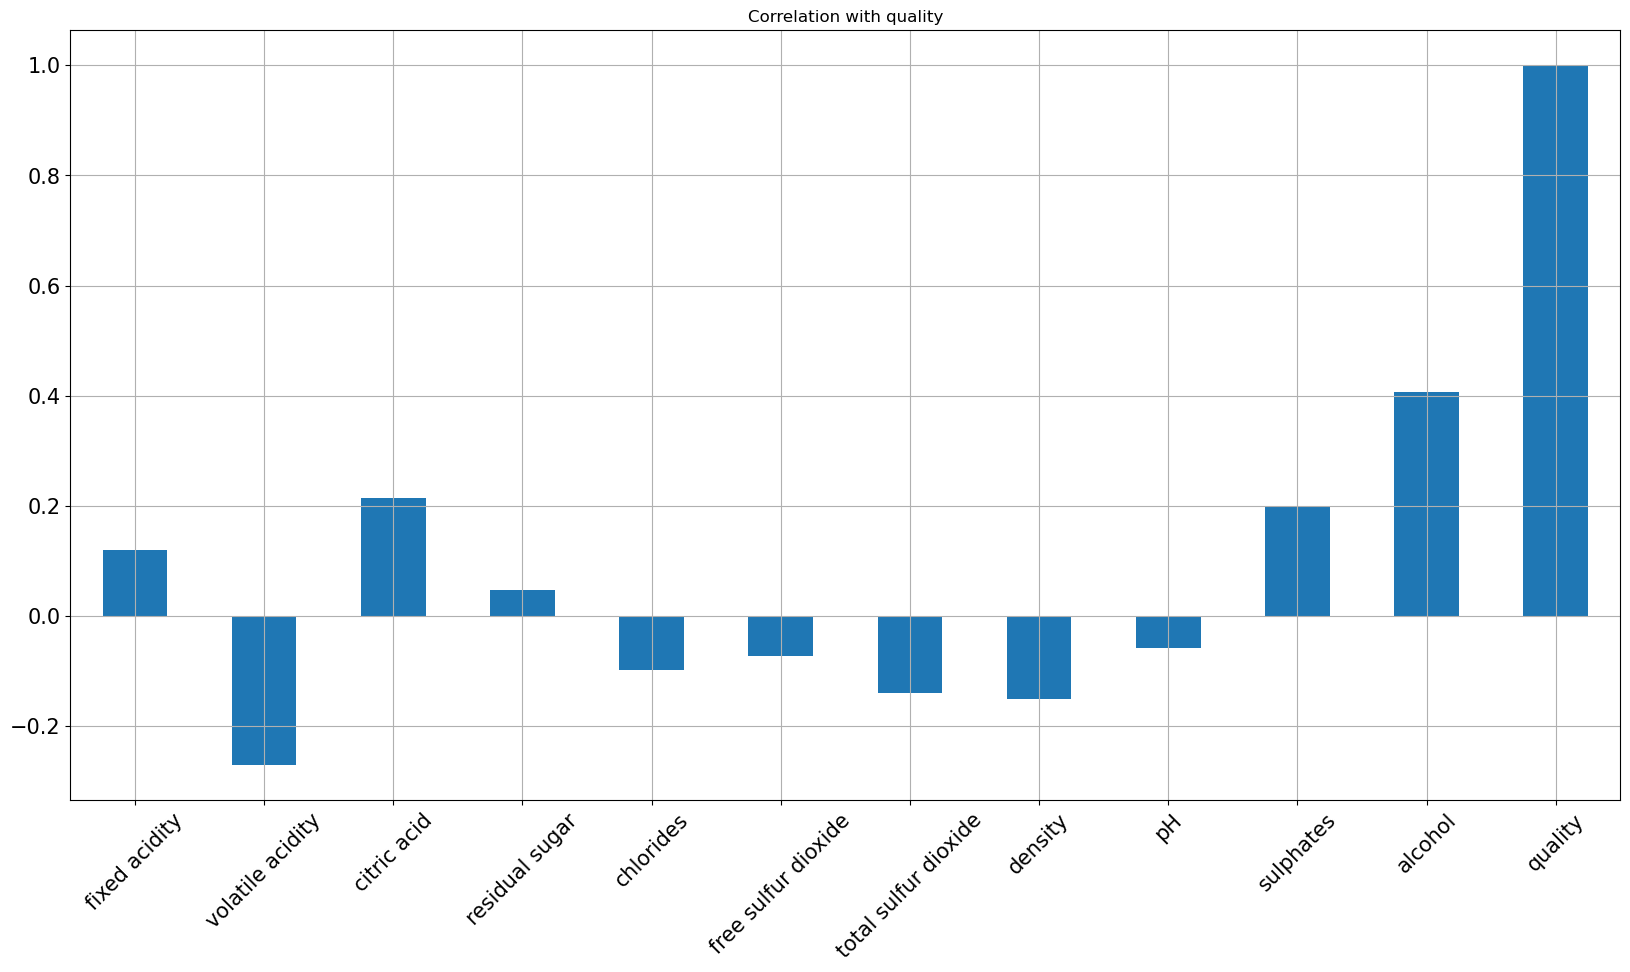

In [16]:
wine.corrwith(wine.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)
plt.show()

In [18]:
## Correlation Matrix
sns.set(style="dark")

# Compute the correlation matrix
corr = wine.corr()

In [19]:
corr.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.120061
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.270712
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.214716
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.047779
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.097308


- Correlation Matrix

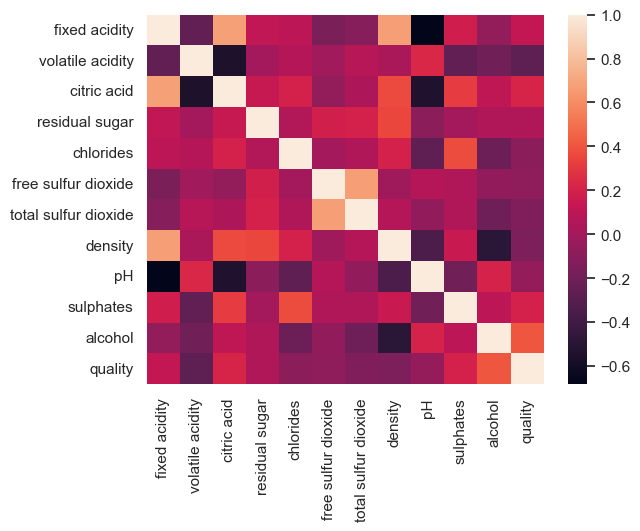

In [22]:
sns.heatmap(corr)
plt.show()

# INSIGHTS

- Alcohol and Quality: There is a positive correlation between alcohol content and quality, suggesting that higher alcohol content may be associated with better wine quality.

- Density and Alcohol: A strong negative correlation exists between density and alcohol, indicating that as alcohol content increases, density decreases.

- Free Sulfur Dioxide and Total Sulfur Dioxide: These two features are positively correlated, which is expected since total sulfur dioxide includes free sulfur dioxide.

- Fixed Acidity and pH: There is a negative correlation between fixed acidity and pH, indicating that as acidity increases, pH (which measures acidity inversely) decreases.

- Residual Sugar and Density: A positive correlation between residual sugar and density suggests that wines with more sugar tend to be denser.

# Model Preparation & Feature Engineering

- We would be dividing the dataset in x and y. 
- x being the independent variable, y being the dependent one

In [23]:
x = wine.drop('quality',axis=1)
y=wine['quality']

In [24]:
x.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [25]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: quality, dtype: int32

In [27]:
wine.columns[:11]

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [28]:
features_label = wine.columns[:11]

In [30]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(x, y)
importances = classifier.feature_importances_
indices = np. argsort(importances)[::-1]
for i in range(x.shape[1]):
    print ("%2d) %-*s %f" % (i + 1, 30, features_label[i],importances[indices[i]]))

 1) fixed acidity                  0.178690
 2) volatile acidity               0.128748
 3) citric acid                    0.106496
 4) residual sugar                 0.095718
 5) chlorides                      0.089280
 6) free sulfur dioxide            0.083482
 7) total sulfur dioxide           0.070669
 8) density                        0.070104
 9) pH                             0.060459
10) sulphates                      0.060048
11) alcohol                        0.056307


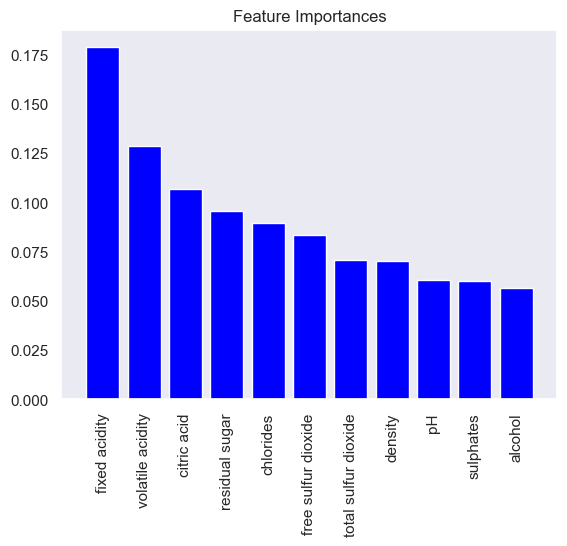

In [33]:
plt.title('Feature Importances')
plt.bar(range(x.shape[1]),importances[indices], color="blue", align="center")
plt.xticks(range(x.shape[1]),features_label, rotation=90)
plt.xlim([-1, x.shape[1]])
plt.show()

In [35]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection  import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 5)

In [36]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train2 = pd.DataFrame(sc.fit_transform(x_train))
x_test2 = pd.DataFrame(sc.transform(x_test))
x_train2.columns = x_train.columns.values
x_test2.columns = x_test.columns.values
x_train2.index = x_train.index.values
x_test2.index = x_test.index.values
x_train = x_train2
x_test = x_test2

In [37]:
#Using Principal Dimensional Reduction
from sklearn.decomposition import PCA
pca = PCA(n_components = 4)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
explained_variance = pca.explained_variance_ratio_
print(pd.DataFrame(explained_variance))

          0
0  0.281687
1  0.171462
2  0.143245
3  0.114765


In [39]:
#### Model Building ####


## Logistic Regression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, penalty = 'l2')
classifier.fit(x_train, y_train)

# Predicting Test Set
y_pred = classifier.predict(x_test)
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

results = pd.DataFrame([['Logistic Regression', acc, prec, rec, f1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
print(results)

                 Model  Accuracy  Precision   Recall  F1 Score
0  Logistic Regression   0.86875        0.6  0.26087  0.363636


# Model Evaluation

In [41]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

-0.16788321167883224

# INSIGHT

- Negative r-squared Score: A negative r-squared score suggests that the model performs worse than a horizontal line (which would predict the mean of the target variable for all inputs). Essentially, the model's predictions are not aligned with the actual values, and using the mean as a predictor would be better.

- Poor Model Performance: This score indicates poor performance of the regression model on the test data. The model is not capturing the underlying patterns in the data effectively.

- Need for Model Improvement: To improve this score, you might need to explore different models, tune hyperparameters, or enhance the feature engineering process.